# **Recozimento - Data Science Project**


Será que a largura da peça afetou diretamente no resultado final do recozimento? Qual foi a proporção dos resultados em Agosto/2020? Iremos responder essas e outras perguntas utilizando uma base de dados fornecida pela ICTS Protiviti.

O recozimento é um tratamento térmico que tem por finalidade eliminar a dureza de 
uma peça temperada ou normalizar materiais com tensões internas resultantes do 
forjamento, da laminação e da trefilação. De acordo com o novo nível de dureza do 
material tratado, o resultado do processo de recozimento pode ser classificado como: 
ideal, mediano ou ruim. 

In [1]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/dQpUkK59l5Imxsh8jN/giphy.gif')

**Sobre os dados**

Esse estudo estará utilizando dados fornecidos pela equipe da ICTS Protiviti, na qual disponibilizou o dataset de treinamento, teste e data dos experimentos.

Com base nas informações dispostas nesses datasets, realizarei insights acerca dos processos de recozimento e por fim treinar um modelo de machine learning para predizer o resultado de novos processos de recozimento.

Importante ressaltar que para tal conjunto de dados, somente experimentos realizados em agosto de 2020 serão considerados.


**Perguntas a serem respondidas**

Dentre alguns dos questionamentos que podem ser gerados com estes dados, tenho interesse em saber a resposta para as seguintes perguntas:
- Qual foi o resultado dos processos de recozimento em Agosto/2020?
- Existe relação da força da peça com a forma?
- Será que o tipo de aço com mais largura tem um recozimento melhor?



In [2]:
#Importando os dados
import pandas as pd

data_experimentos = pd.read_csv("data_experimentos.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
#Importando numpy e bibliotecas de visualização 

import numpy as np #algebra
import seaborn as sns #gráficos
import matplotlib.pyplot as plt #plotagem
%matplotlib inline

In [4]:
print("O dataset com a data dos experimentos possui %s linhas e %s colunas" %(data_experimentos.shape[0], data_experimentos.shape[1]))
print("O dataset de treinamento possui %s linhas e %s colunas" %(train.shape[0], train.shape[1]))
print("O dataset de teste possui %s linhas e %s colunas" %(test.shape[0], test.shape[1]))

O dataset com a data dos experimentos possui 2424 linhas e 3 colunas
O dataset de treinamento possui 2424 linhas e 40 colunas
O dataset de teste possui 90 linhas e 39 colunas


In [5]:
data_experimentos.head(5)

,exp_id,ano,mes
0,2,2020,8
1,1368,2020,8
2,1130,2020,8
3,402,2020,8
4,407,2020,8


In [6]:
train.head(5)

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
0,?,C,A,8,0,?,S,?,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim,exp_2
1,?,C,R,0,0,?,S,2.0,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim,exp_1368
2,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal,exp_1130
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal,exp_402
4,?,C,A,0,45,?,S,?,0,?,?,D,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano,exp_407


Acima temos as primeiras linhas do nosso dataset de treino e data dos experimentos.

Conforme comentado, somente experimentos realizados em agosto de 2020 serão considerados, então, vamos unir o conjunto de dados principal (train.csv) à tabela acessória (data_experimentos.csv) através da chave experimento/exp_id, que é um relacionamento 1x1. 

In [7]:
#Primento, vamos transformar os dados da coluna "exp_id" em string no dataset "data_experimentos"
data_experimentos['exp_id'] = data_experimentos['exp_id'].astype(str)

#Segundo, vamos remover o pedaço "exp_" dos dados da coluna "experimento" no dataset de "treino"
train['experimento'] = train['experimento'].apply(lambda x: x.replace('exp_', ''))

#Por último, vamos fazer um join entre as tabelas e filtrar somente os dados de Agosto/2020
train = train.join(data_experimentos.set_index('exp_id'), on='experimento')
train = train.query('ano==2020 & mes==8')

In [8]:
print("A união entre o dataset de treino com o de data dos experimentos possui %s linhas e %s colunas" %(train.shape[0], train.shape[1]))

A união entre o dataset de treino com o de data dos experimentos possui 808 linhas e 42 colunas


**Dicionário de dados**

Para facilitar o entendimento a qualquer leitor, irei colocar o significado de algumas variáveis:

**carbon** - carbono (Variável contínua)

**hardness** - dureza da peça (Variável contínua)

**strength** - força (Variável contínua)

**len** - comprimento da peça (Variável contínua)

**width** - largura da peça (Variável contínua)

**thick** - espessura da peça (Variável contínua)

**shape** - formato (Variável categórica)

**bore** - diâmetro (Variável categórica)

**Dados de treino**

In [9]:
train.head(5)

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento,ano,mes
0,?,C,A,8,0,?,S,?,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim,2,2020,8
1,?,C,R,0,0,?,S,2.0,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim,1368,2020,8
2,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal,1130,2020,8
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal,402,2020,8
4,?,C,A,0,45,?,S,?,0,?,?,D,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano,407,2020,8


Alguns valores estão representados por "?" e não conseguimos ter a visualização da quantidade de nulos, então vamos transformar esses dados

In [10]:
#Transformando dados para visualização de valores missing
train = train.apply(lambda x: x.replace('?', np.nan))

In [11]:
#Verificando as informações do dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 807
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  117 non-null    object 
 1   product-type            808 non-null    object 
 2   steel                   731 non-null    object 
 3   carbon                  808 non-null    int64  
 4   hardness                808 non-null    int64  
 5   temper_rolling          127 non-null    object 
 6   condition               534 non-null    object 
 7   formability             517 non-null    object 
 8   strength                808 non-null    int64  
 9   non-ageing              95 non-null     object 
 10  surface-finish          8 non-null      object 
 11  surface-quality         593 non-null    object 
 12  enamelability           13 non-null     object 
 13  bc                      1 non-null      object 
 14  bf                      118 non-null    ob

In [11]:
#Resumo estatístico do dataset de treino
train.describe()

,carbon,hardness,strength,m,marvi,corr,jurofm,s,p,bore,ano,mes
count,808.000000,808.000000,808.000000,0.0,0.0,0.0,0.0,0.0,0.0,808.000000,808.0,808.0
mean,3.492574,12.357673,30.829208,NaN,NaN,NaN,NaN,NaN,NaN,28.465347,2020.0,8.0
std,13.542716,25.134918,116.203601,NaN,NaN,NaN,NaN,NaN,NaN,125.177926,0.0,0.0
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2020.0,8.0
25%,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2020.0,8.0
50%,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2020.0,8.0
75%,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2020.0,8.0
max,70.000000,85.000000,700.000000,NaN,NaN,NaN,NaN,NaN,NaN,600.000000,2020.0,8.0


A função describe permite saber rapidamente um resumo estatístico do DataFrame, como média, desvio padrão, nº máximo, nº mínimo, moda, media e quartis.

In [12]:
#Visualizando quantidade de valores nulos nas colunas
train.isnull().sum().sort_values(ascending=False)

marvi                     808
m                         808
corr                      808
jurofm                    808
s                         808
p                         808
bc                        807
exptl                     806
blue/bright/varn/clean    803
phos                      802
surface-finish            800
packing                   799
enamelability             795
chrom                     784
ferro                     781
lustre                    762
oil                       750
cbond                     741
bt                        740
non-ageing                713
family                    691
bf                        690
temper_rolling            681
bl                        673
bw/me                     617
formability               291
condition                 274
surface-quality           215
steel                      77
ano                         0
product-type                0
carbon                      0
hardness                    0
recoziment

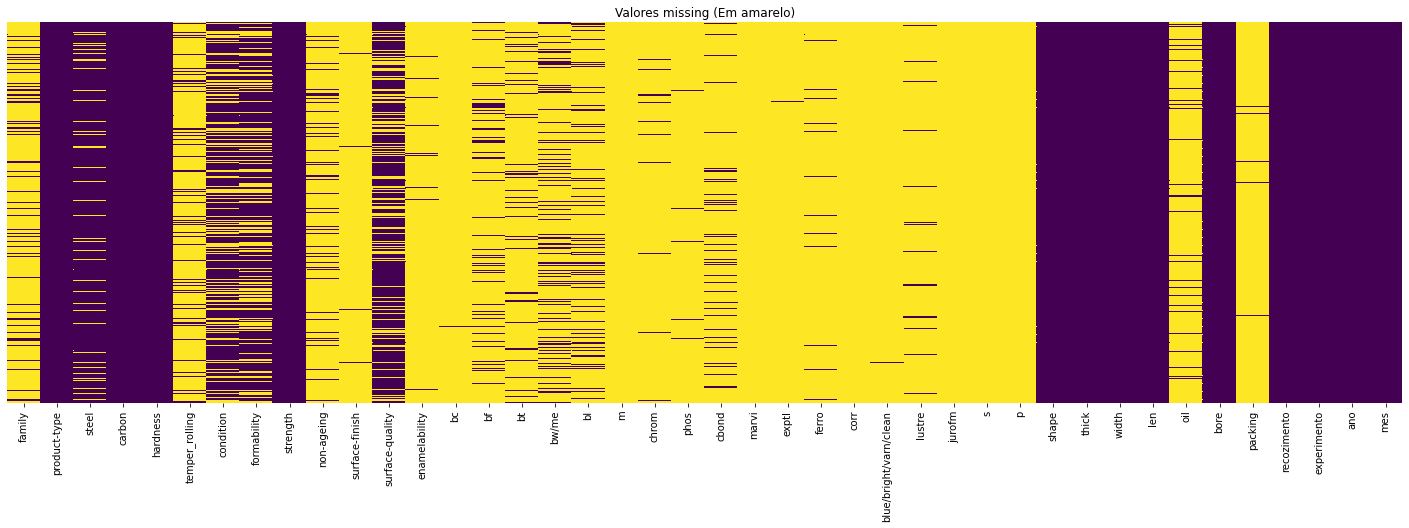

In [13]:
# Plotagem dos valores missing (nulos)
plt.subplots(figsize=(25,7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.title("Valores missing (Em amarelo)");

**Dados de teste**

In [14]:
test.head(5)

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,id
0,?,C,K,55,0,?,?,?,0,?,?,?,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.200,900.0,0,?,0,?,1
1,?,C,K,45,0,?,?,?,0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,1.090,610.0,0,?,0,?,2
2,?,C,R,0,0,?,S,3.0,0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,1.599,150.0,762,?,0,?,3
3,?,C,A,0,0,?,S,2.0,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,0.400,20.0,0,?,0,?,4
4,?,C,R,0,0,?,S,2.0,0,?,?,E,?,?,?,Y,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,0.699,1320.0,0,?,0,?,5


In [15]:
'''Alguns valores estão representados por "?" e não conseguimos ter a visualização da 
quantidade de nulos, então também vamos transformar esses dados'''

test = test.apply(lambda x: x.replace('?', np.nan))

In [16]:
#Verificando as informações do dataset de teste
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  9 non-null      object 
 1   product-type            90 non-null     object 
 2   steel                   81 non-null     object 
 3   carbon                  90 non-null     int64  
 4   hardness                90 non-null     int64  
 5   temper_rolling          10 non-null     object 
 6   condition               61 non-null     object 
 7   formability             63 non-null     object 
 8   strength                90 non-null     int64  
 9   non-ageing              10 non-null     object 
 10  surface-finish          1 non-null      object 
 11  surface-quality         61 non-null     object 
 12  enamelability           3 non-null      object 
 13  bc                      0 non-null      float64
 14  bf                      11 non-null     obje

In [17]:
#Resumo estatístico do dataset de teste
test.describe()

,carbon,hardness,strength,bc,m,marvi,exptl,corr,jurofm,s,p,thick,width,len,bore,packing,id
count,90.000000,90.000000,90.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.000000,90.000000,90.000000,90.000000,0.0,90.000000
mean,4.911111,6.555556,29.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.230889,769.914444,1539.488889,25.555556,NaN,45.500000
std,15.214308,20.370783,103.665709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806629,416.968197,2003.159708,119.513161,NaN,26.124701
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,20.000000,0.000000,0.000000,NaN,1.000000
25%,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699000,609.900000,0.000000,0.000000,NaN,23.250000
50%,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800500,610.000000,762.000000,0.000000,NaN,45.500000
75%,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,1242.500000,4170.000000,0.000000,NaN,67.750000
max,65.000000,85.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.201000,1500.000000,4880.000000,600.000000,NaN,90.000000


In [18]:
#Visualizando quantidade de valores nulos nas colunas
test.isnull().sum().sort_values(ascending=False)

s                         90
jurofm                    90
marvi                     90
exptl                     90
corr                      90
bc                        90
m                         90
p                         90
packing                   90
blue/bright/varn/clean    89
phos                      89
surface-finish            89
chrom                     88
enamelability             87
ferro                     87
lustre                    85
bt                        84
oil                       84
cbond                     83
family                    81
non-ageing                80
temper_rolling            80
bf                        79
bl                        76
bw/me                     70
condition                 29
surface-quality           29
formability               27
steel                      9
product-type               0
carbon                     0
hardness                   0
shape                      0
strength                   0
bore          

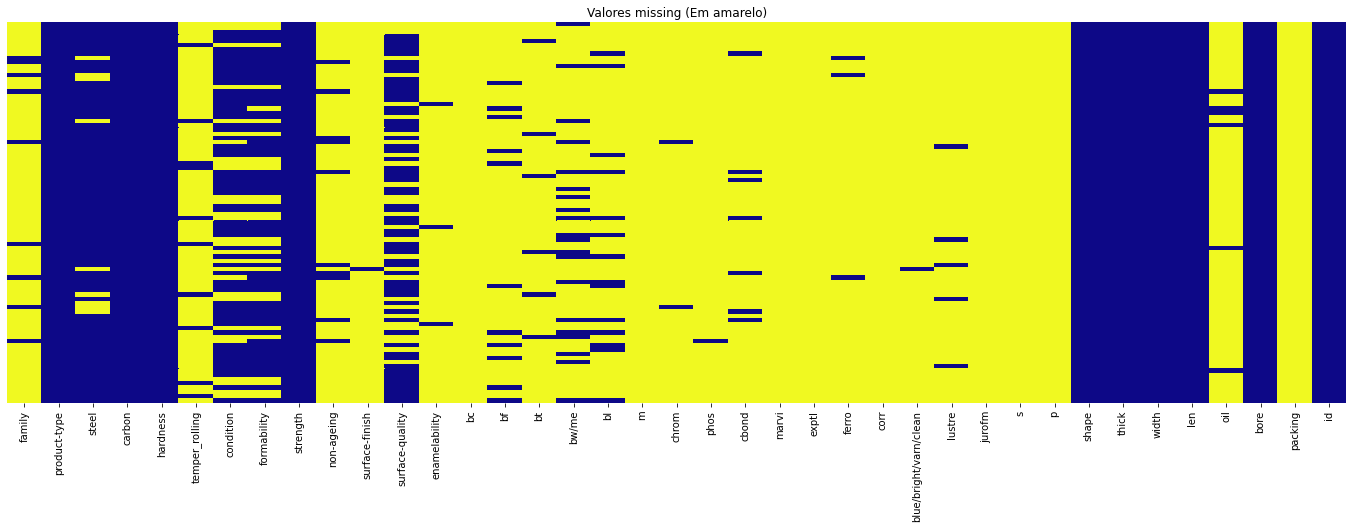

In [19]:
# Plotagem dos valores missing (nulos)
plt.subplots(figsize=(24,7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='plasma');
plt.title("Valores missing (Em amarelo)");

A princípio as informações podem parecer nebulosas, então, vamos esclarecer alguns pontos sobre isso começando pelas colunas que não usaremos por apresentarem mais de 88,5% dos dados nulos como por exemplo a “marvi”, “m” e “corr”. Também não usaremos a coluna de "ano" e "mes", pois todos os dados contém informações sobre agosto/2020. 

Acredito que informações deste tipo não são relevantes ao estudo que faremos e sua permanência poderia causar perda de foco, sem contar a quantidade considerável de valores nulos.

In [20]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/13GIgrGdslD9oQ/giphy.gif')

**Tratando dados para visualização**

Provavelmente você já teve ter percebido que os valores das colunas 'len', 'thick' e 'width' estão entre um '_'.

Vamos prosseguir com a tratativa dos dados, removendo esses '_' e transformando as colunas em type 'int' e 'float', assim conseguimos realizar mais análises

In [21]:
#Transformando os dados em string para realizar o replace
train['thick'] = train['thick'].astype(str)
train['len'] = train['len'].astype(str)
train['width'] = train['width'].astype(str)

In [22]:
#Removendo os '_'
train['thick'] = train['thick'].apply(lambda x: x.replace('_', ''))
train['len'] = train['len'].apply(lambda x: x.replace('_', ''))
train['width'] = train['width'].apply(lambda x: x.replace('_', ''))

In [23]:
#Transformando os dados para 'int' e 'float'
train['thick'] = train['thick'].astype(float)
train['len'] = train['len'].astype(int)
train['width'] = train['width'].astype(float)

**Visualização de dados**

Vamos ao nosso primeiro questionamento:

*Qual foi o resultado dos processos de recozimento em Agosto/2020?*

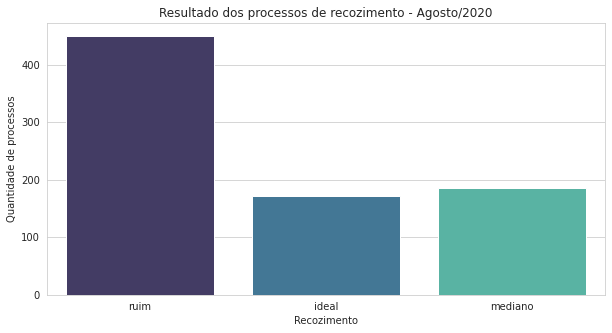

In [24]:
#Resultados dos processos de recozimento
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='recozimento',data=train,palette='mako');
plt.title("Resultado dos processos de recozimento - Agosto/2020");
plt.xlabel("Recozimento");
plt.ylabel("Quantidade de processos");

In [25]:
#Contagem de processos de recozimento
train['recozimento'].value_counts()

ruim       450
mediano    186
ideal      172
Name: recozimento, dtype: int64

Acima temos os resultados dos processos de recozimento em agosto/2020 e vale lembrar que estamos falando de 808 processos.

De acordo com a amostra o número de recozimentos 'ruim' foi superior aos de 'ideal' e 'mediano', a tabela fica assim:
- Recozimentos '**ruim**': 450 processos, representando aproximadamente 55,70% dos nossos dados. 
- Recozimentos '**medianos**': 186 processos, representando aproximadamente 23% dos nossos dados.
- Recozimentos '**ideal**': 172 processos, representando aproximadamente 21,30% dos nossos dados.


Conforme já comentado o recozimento tem por finalidade eliminar a dureza de uma peça...Isso me deixou curioso: existe uma relação entre a dureza da peça e o resultado final de seu recozimento?

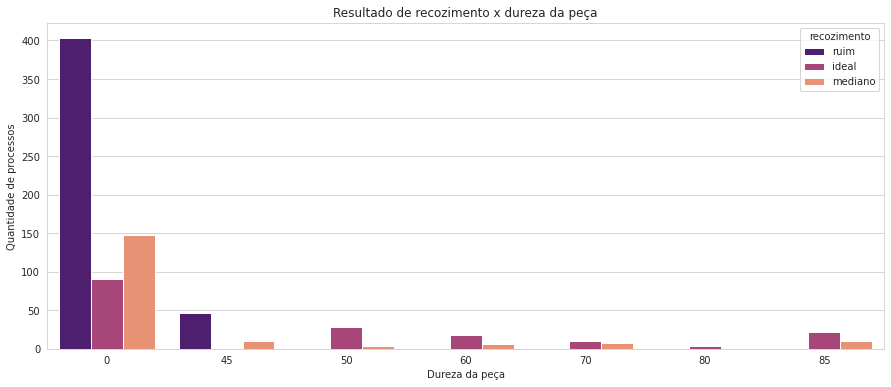

In [26]:
#Countplot de dureza da peça x resultado do recozimento
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='hardness',hue='recozimento',data=train,palette='magma');
plt.title("Resultado de recozimento x dureza da peça");
plt.ylabel("Quantidade de processos");
plt.xlabel("Dureza da peça");

Através do gráfico acima, podemos ver que existe sim uma relação entre a dureza das peças e o resultado final do recozimento. Apesar de termos muitos processos com peças de dureza '0', conseguimos notar que essas obtém um maior número de recozimento ruim. E mais, apesar de poucos processos em peças com dureza '50' em diante, o resultado de recozimentos fica somente entre mediano e ideal.

**Foco, força e shape?**

Após descobrirmos os resultados dos processos de recozimento e entendermos que o tipo de dureza pode afetar em seu desempenho, vamos analisar a relação da força com seu formato. Será que isso afeta no recozimento?

Para responder a isso, vamos inicialmente olhar a distribuição da varíavel 'strength' em nossos dados.

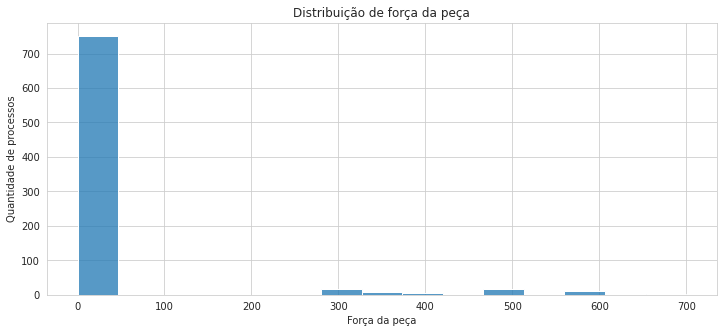

In [27]:
#Distplot variável strength
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.histplot(train['strength'],kde=False,bins=15);
plt.title("Distribuição de força da peça");
plt.ylabel("Quantidade de processos");
plt.xlabel("Força da peça");

Apesar de conseguirmos saber a distribuição olhando o gráfico de histograma, nós também conseguimos chegar neste mesmo resultado através da seguinte consulta:

In [28]:
train['strength'].value_counts().sort_index()

0      751
300      2
310     16
350      7
400      4
500     16
600     11
700      1
Name: strength, dtype: int64

Confesso que para minha surpresa, olhando o histograma acima vimos que boa parte dos dados está concentrado em força '0' (Aproximadamente 93%).

O que nos resta saber é se esses dados também estão concentrados em um 'shape' específico, vamos analisar:


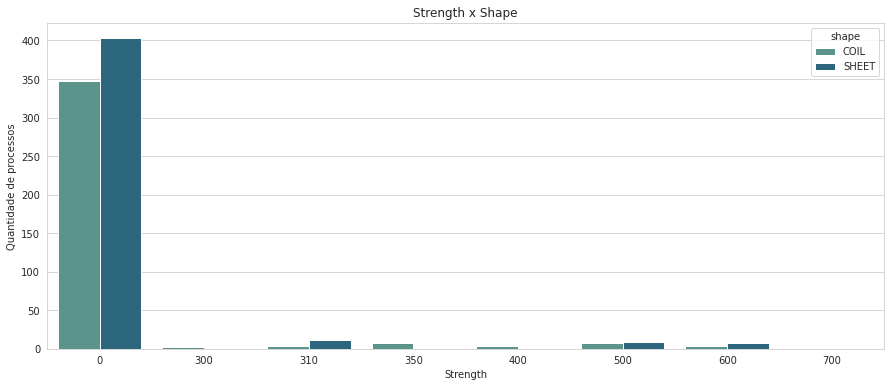

In [29]:
#Countplot de força x formato
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='strength',hue='shape',data=train,palette='crest');
plt.title("Strength x Shape");
plt.ylabel("Quantidade de processos");
plt.xlabel("Strength");

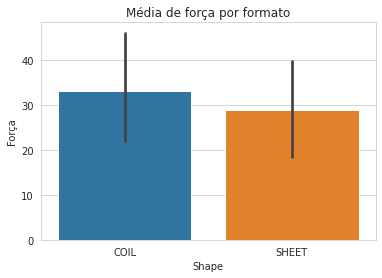

In [30]:
#Barplot de força x formato
sns.set_style('whitegrid')
sns.barplot(x='shape',y='strength',data=train,estimator=np.mean);
plt.title("Média de força por formato");
plt.ylabel("Força");
plt.xlabel("Shape");

Aqui temos uma surpresa, se analisarmos o gráfico de countplot 'Strength x Shape' conseguimos ver que nitidamente temos mais processos com o formato "SHEET", porém quando olhamos o gráfico de barplot acima, a média de força do formato 'COIL' é maior.

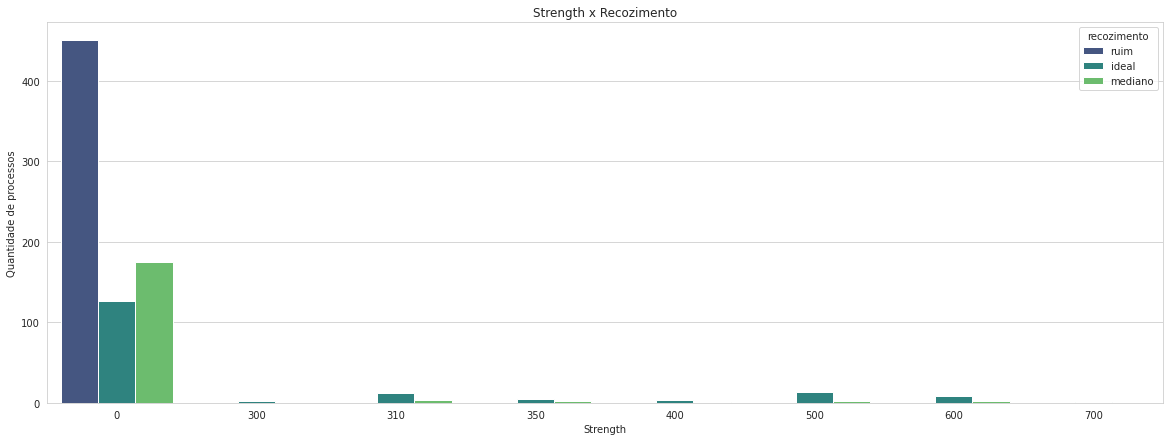

In [31]:
#Countplot de força x recozimento
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='strength',data=train,hue='recozimento',palette='viridis',);
plt.title("Strength x Recozimento");
plt.ylabel("Quantidade de processos");
plt.xlabel("Strength");

Com o gráfico acima conseguimos chegar a conclusão de que a força da peça x formato tem uma relação no resultado final do recozimento. Embora o conjunto de dados tenha mais o formato 'SHEET', vimos que sua força média é menor que do formato 'COIL' e no Countplot acima podemos notar que quanto menor a força, mais chances do recozimento ser 'ruim'.


In [32]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/3avUsGhmckIYE/giphy.gif')

**Tipos de aço: Isso não é um 'S'. Em meu planeta significa Science**

Nosso último questionamento gira em torno dos tipos de aço e a sua largura.

Vamos começar olhando pra variável largura. Será que quanto mais largura melhor o recozimento?

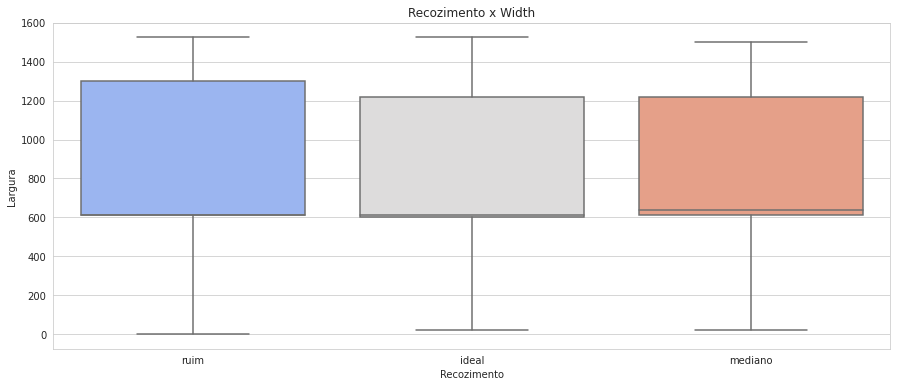

In [33]:
#boxplot de Largura x Recozimento
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x="recozimento", y="width",data=train, palette="coolwarm");
plt.title("Recozimento x Width");
plt.ylabel("Largura");
plt.xlabel("Recozimento");

Olhando o boxplot acima, conseguimos perceber que conforme a largura vai passando de '1200' nosso processo de recozimento ligeiramente tem mais chances de ser 'ruim'.

Já os recozimentos 'ideal' e 'mediano' ficam na média de '600' quando falamos da variável largura'.

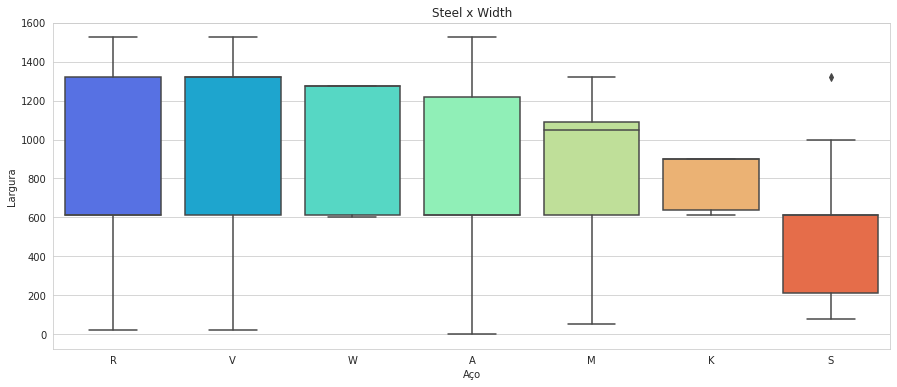

In [34]:
#boxplot de Steel x Width
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x="steel", y="width", data=train,palette='rainbow',order=['R','V','W','A','M','K','S']);
plt.title("Steel x Width");
plt.ylabel("Largura");
plt.xlabel("Aço");

Conseguimos observar no gráfico acima os tipos de aço, representados respectivamente pelas letras: R, V, W, A, M, K e S.

Já descobrimos que quanto maior a largura pode ser que exista mais chances de um recozimento ruim, então vale o destaque para os tipos de aço 'R' e 'V' para analisarmos se de fato isso ocorre. Também podemos olhar para 'K' e 'S', pois apresentam uma largura menor, será que vão ter um bom recozimento?

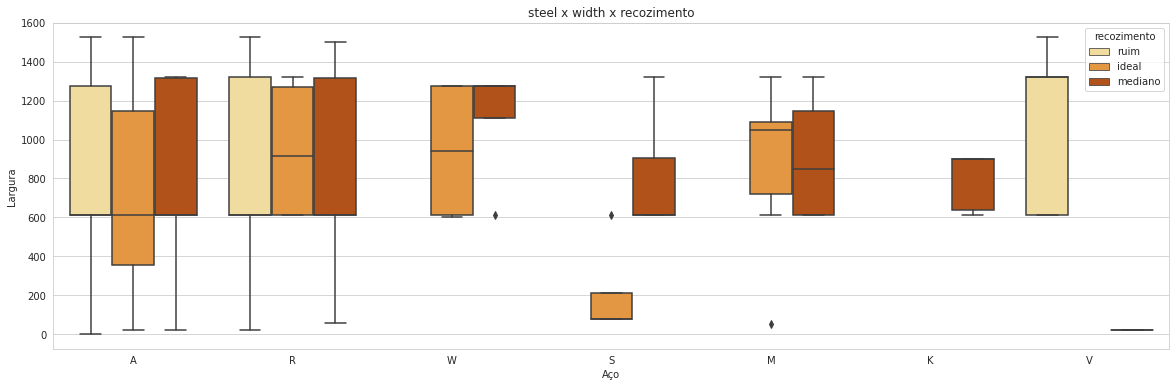

In [35]:
#boxplot steel x width x recozimento
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.boxplot(x="steel", y="width", hue="recozimento",data=train, palette="YlOrBr",order=['A','R','W','S','M','K','V']);
plt.title("steel x width x recozimento");
plt.ylabel("Largura");
plt.xlabel("Aço");

Analisando o boxplot final acima, claro que é válido considerarmos que o maior volume de dados se encontram em aços do tipo 'A' e 'R'. Ainda assim, conforme destacamos 'R' e 'V' apresentaram uma largura maior em comparação com os outros aços, com o gráfico acima podemos comprovar que ambas tiveram um volume considerável de recozimentos 'ruim'.

Em contrapartida também destacamos os aços 'K' e 'S' por terem apresentado uma largura menor e com o boxplot acima vimos que todos os processos de recozimento com esses aços deram 'mediano' ou 'ideal'.

# **Machine Learning**

Feita nossas análises, vamos criar nosso modelo de machine learning.

Começando pelas variáveis que iremos usar, aquelas que não apresentaram mais que 88,5% dos dados nulos.

In [36]:
#Lista das variáveis que iremos usar

variaveis_entrada = ['thick','width','len','bore','shape','strength','hardness','carbon','product-type','steel',
                     'surface-quality','condition','formability','bw/me','bl',
                     'temper_rolling','bf','family','non-ageing']

Agora que já sabemos as variáveis que vamos usar, vamos validar nossos dados de treinamento e teste, assim conseguimos saber quais dados precisamos tratar.

In [37]:
# Validação dos dados de treinamento
print('Quantidade de linhas:', train[variaveis_entrada].shape[0])
print('Quantidade de colunas:', train[variaveis_entrada].shape[1])
print('-' * 10)

print('Registros duplicados:', train[variaveis_entrada].duplicated().any())
print('-' * 10)

print('Valores faltantes:', train[variaveis_entrada].isnull().values.sum())
print('\n')
print('Registros únicos: \n\n', train[variaveis_entrada].nunique())
print('-' * 10)

print('Quantidade de valores faltantes por coluna: \n')
for i in train[variaveis_entrada].columns:
    nullNum = train[variaveis_entrada][i].isnull().sum()
    nullRate = nullNum / len(train) * 100 
    if nullRate > 0:
        print(f"{i} {nullNum} ({nullRate:.2f}%)")

Quantidade de linhas: 808
Quantidade de colunas: 19
----------
Registros duplicados: True
----------
Valores faltantes: 4922


Registros únicos: 

 thick              49
width              67
len                24
bore                3
shape               2
strength            8
hardness            7
carbon             10
product-type        1
steel               7
surface-quality     4
condition           2
formability         4
bw/me               2
bl                  1
temper_rolling      1
bf                  1
family              2
non-ageing          1
dtype: int64
----------
Quantidade de valores faltantes por coluna: 

steel 77 (9.53%)
surface-quality 215 (26.61%)
condition 274 (33.91%)
formability 291 (36.01%)
bw/me 617 (76.36%)
bl 673 (83.29%)
temper_rolling 681 (84.28%)
bf 690 (85.40%)
family 691 (85.52%)
non-ageing 713 (88.24%)


In [38]:
# Validação dos dados de teste
print('Quantidade de linhas:', test[variaveis_entrada].shape[0])
print('Quantidade de colunas:', test[variaveis_entrada].shape[1])
print('-' * 10)

print('Registros duplicados:', test[variaveis_entrada].duplicated().any())
print('-' * 10)

print('Valores faltantes:', test[variaveis_entrada].isnull().values.sum())
print('\n')
print('Registros únicos: \n\n', test[variaveis_entrada].nunique())
print('-' * 10)

print('Quantidade de valores faltantes por coluna: \n')
for i in test[variaveis_entrada].columns:
    nullNum = test[variaveis_entrada][i].isnull().sum()
    nullRate = nullNum / len(train) * 100 
    if nullRate > 0:
        print(f"{i} {nullNum} ({nullRate:.2f}%)")

Quantidade de linhas: 90
Quantidade de colunas: 19
----------
Registros duplicados: False
----------
Valores faltantes: 560


Registros únicos: 

 thick              26
width              27
len                10
bore                3
shape               2
strength            4
hardness            6
carbon              6
product-type        1
steel               6
surface-quality     4
condition           2
formability         4
bw/me               2
bl                  1
temper_rolling      1
bf                  1
family              2
non-ageing          1
dtype: int64
----------
Quantidade de valores faltantes por coluna: 

steel 9 (1.11%)
surface-quality 29 (3.59%)
condition 29 (3.59%)
formability 27 (3.34%)
bw/me 70 (8.66%)
bl 76 (9.41%)
temper_rolling 80 (9.90%)
bf 79 (9.78%)
family 81 (10.02%)
non-ageing 80 (9.90%)


**Tratamento dos dados nulos - Substituindo pelo valor que mais se repete**


In [39]:
#Steel

#train['steel'].value_counts().to_frame() - Verificando valor que mais aparece
train['steel'] = train['steel'].fillna(train['steel'].mode()[0])
test['steel'] = test['steel'].fillna(test['steel'].mode()[0])

In [40]:
#surface-quality

#train['surface-quality'].value_counts().to_frame() - Verificando valor que mais aparece
train['surface-quality'] = train['surface-quality'].fillna(train['surface-quality'].mode()[0])
test['surface-quality'] = test['surface-quality'].fillna(test['surface-quality'].mode()[0])

In [41]:
#condition

#train['condition'].value_counts().to_frame() - Verificando valor que mais aparece
train['condition'] = train['condition'].fillna(train['condition'].mode()[0])
test['condition'] = test['condition'].fillna(test['condition'].mode()[0])

In [42]:
#formability

#train['formability'].value_counts().to_frame() - Verificando valor que mais aparece
train['formability'] = train['formability'].fillna(train['formability'].mode()[0])
test['formability'] = test['formability'].fillna(test['formability'].mode()[0])

In [43]:
#bw/me

#train['bw/me'].value_counts().to_frame() - Verificando valor que mais aparece
train['bw/me'] = train['bw/me'].fillna(train['bw/me'].mode()[0])
test['bw/me'] = test['bw/me'].fillna(test['bw/me'].mode()[0])

In [44]:
#bl

#train['bl'].value_counts().to_frame() - Verificando valor que mais aparece
train['bl'] = train['bl'].fillna(train['bl'].mode()[0])
test['bl'] = test['bl'].fillna(test['bl'].mode()[0])

In [45]:
#temper_rolling

#train['temper_rolling'].value_counts().to_frame() - Verificando valor que mais aparece
train['temper_rolling'] = train['temper_rolling'].fillna(train['temper_rolling'].mode()[0])
test['temper_rolling'] = test['temper_rolling'].fillna(test['temper_rolling'].mode()[0])

In [46]:
#bf

#train['bf'].value_counts().to_frame() - Verificando valor que mais aparece
train['bf'] = train['bf'].fillna(train['bf'].mode()[0])
test['bf'] = test['bf'].fillna(test['bf'].mode()[0])

In [47]:
#family

#train['family'].value_counts().to_frame() - Verificando valor que mais aparece
train['family'] = train['family'].fillna(train['family'].mode()[0])
test['family'] = test['family'].fillna(test['family'].mode()[0])

In [48]:
#non-ageing

#train['non-ageing'].value_counts().to_frame() - Verificando valor que mais aparece
train['non-ageing'] = train['non-ageing'].fillna(train['non-ageing'].mode()[0])
test['non-ageing'] = test['non-ageing'].fillna(test['non-ageing'].mode()[0])

In [49]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/NsBknNwmmWE8WU1q2U/giphy.gif')

**Validando os dados novamente após tratamento de nulos**

In [51]:
# Validação dos dados de treinamento
print('Quantidade de linhas:', train[variaveis_entrada].shape[0])
print('Quantidade de colunas:', train[variaveis_entrada].shape[1])
print('-' * 10)

print('Registros duplicados:', train[variaveis_entrada].duplicated().any())
print('-' * 10)

print('Valores faltantes:', train[variaveis_entrada].isnull().values.sum())
print('\n')
print('Registros únicos: \n\n', train[variaveis_entrada].nunique())
print('-' * 10)

print('Quantidade de valores faltantes por coluna: \n')
for i in train[variaveis_entrada].columns:
    nullNum = train[variaveis_entrada][i].isnull().sum()
    nullRate = nullNum / len(train) * 100 
    if nullRate > 0:
        print(f"{i} {nullNum} ({nullRate:.2f}%)")

Quantidade de linhas: 808
Quantidade de colunas: 19
----------
Registros duplicados: True
----------
Valores faltantes: 0


Registros únicos: 

 thick              49
width              67
len                24
bore                3
shape               2
strength            8
hardness            7
carbon             10
product-type        1
steel               7
surface-quality     4
condition           2
formability         4
bw/me               2
bl                  1
temper_rolling      1
bf                  1
family              2
non-ageing          1
dtype: int64
----------
Quantidade de valores faltantes por coluna: 



In [52]:
# Validação dos dados de teste
print('Quantidade de linhas:', test[variaveis_entrada].shape[0])
print('Quantidade de colunas:', test[variaveis_entrada].shape[1])
print('-' * 10)

print('Registros duplicados:', test[variaveis_entrada].duplicated().any())
print('-' * 10)

print('Valores faltantes:', test[variaveis_entrada].isnull().values.sum())
print('\n')
print('Registros únicos: \n\n', test[variaveis_entrada].nunique())
print('-' * 10)

print('Quantidade de valores faltantes por coluna: \n')
for i in test[variaveis_entrada].columns:
    nullNum = test[variaveis_entrada][i].isnull().sum()
    nullRate = nullNum / len(train) * 100 
    if nullRate > 0:
        print(f"{i} {nullNum} ({nullRate:.2f}%)")

Quantidade de linhas: 90
Quantidade de colunas: 19
----------
Registros duplicados: False
----------
Valores faltantes: 0


Registros únicos: 

 thick              26
width              27
len                10
bore                3
shape               2
strength            4
hardness            6
carbon              6
product-type        1
steel               6
surface-quality     4
condition           2
formability         4
bw/me               2
bl                  1
temper_rolling      1
bf                  1
family              2
non-ageing          1
dtype: int64
----------
Quantidade de valores faltantes por coluna: 



**Divisão entre previsores e classe**

In [50]:
X = train[variaveis_entrada].values
y = train['recozimento'].values

**Label Encoder**

LabelEncoder é uma transformação que fazemos nos dados para converter uma variável categórica em valores númericos.

In [51]:
#Importando biblioteca LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [52]:
#Instanciando objeto da classe LabelEncoder

label_encoder_shape = LabelEncoder()
label_encoder_product = LabelEncoder()
label_encoder_steel = LabelEncoder()
label_encoder_surfacequality = LabelEncoder()
label_encoder_condition = LabelEncoder()
label_encoder_fomability = LabelEncoder()
label_encoder_bw = LabelEncoder()
label_encoder_bl = LabelEncoder()
label_encoder_temper_rolling = LabelEncoder()
label_encoder_bf = LabelEncoder()
label_encoder_family = LabelEncoder()
label_encoder_nonageing = LabelEncoder()

In [53]:
#Convertendo os valores categóricos para númericos

X[:,4] = label_encoder_shape.fit_transform(X[:,4])
X[:,8] = label_encoder_product.fit_transform(X[:,8])
X[:,9] = label_encoder_steel.fit_transform(X[:,9])
X[:,10] = label_encoder_surfacequality.fit_transform(X[:,10])
X[:,11] = label_encoder_condition.fit_transform(X[:,11])
X[:,12] = label_encoder_fomability.fit_transform(X[:,12])
X[:,13] = label_encoder_bw.fit_transform(X[:,13])
X[:,14] = label_encoder_bl.fit_transform(X[:,14])
X[:,15] = label_encoder_temper_rolling.fit_transform(X[:,15])
X[:,16] = label_encoder_bf.fit_transform(X[:,16])
X[:,17] = label_encoder_family.fit_transform(X[:,17])
X[:,18] = label_encoder_nonageing.fit_transform(X[:,18])

**RepeatedKFold**

Um dos métodos mais importante para avaliação de modelos de machine learning é a validação-cruzada, que, em resumo, o que ela faz é dividir um dataset em conjuntos de treino e teste usando o conjunto de treino para treinar o modelo e o conjunto de teste para avaliar quão bom o modelo generaliza para dados que ele ainda não viu.

K-fold é um dos métodos de validação cruzada mais conhecidos, por isso vamos utilizar deste método para descobrir qual algoritmo vamos usar.

In [54]:
#Bibliotecas dos algoritmos

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [55]:
#Importando nosso validador cruzado
from sklearn.model_selection import RepeatedKFold

In [56]:
# Validação cruzada K-Fold

kf = RepeatedKFold (n_splits = 3, n_repeats = 10, random_state=0)
resultados = []
for linhas_treino, linhas_teste in kf.split(X):
    #Divisão treino e teste
    X_train, X_test = X[linhas_treino],X[linhas_teste]
    y_train, y_test = y[linhas_treino],y[linhas_teste]

    #Modelos de machine learning
    #Modelo1 = GaussianNB()
    #Modelo2 = LogisticRegression()
    #Modelo3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
    #Modelo4= RandomForestClassifier(n_estimators = 100, random_state=0, criterion='entropy')
    Modelo5 = XGBClassifier()
    #Modelo6 = LGBMClassifier()

    #Previsões
    Modelo5.fit(X_train,y_train)
    y_pred =  Modelo5.predict(X_test)
    acuracia = np.mean(y_test == y_pred)
    resultados.append(acuracia)
print("Sua precisão foi:", np.mean(resultados))

Sua precisão foi: 0.8201766946624444


**Resultados das validação K-Fold**

Para cada algoritmo foi rodado uma validação, segue resultados de precisão:

*Naive bayes*: 0.759

*Regressão logística*: 0.754

*Árvore de decisão*: 0.719

*Floresta aleatória*: 0.774

*XGBOOST*: 0.820
 
*LGBM*: 0.784

Conforme a tabela de resultados acima, o algoritmo que obteve maior precisão foi o 'XGBClassifier', portanto irei escolher este algoritmo para aplicação nos dados de teste.

Antes, será que conseguimos tunar os parâmetros desse algoritmo e ter um resultado melhor?

In [57]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/tgTUNVNfyq4uyXYMAE/giphy.gif')

**Divisão treino e teste**

Vamos começar dividindo nossos dados entre treino e teste com o método 'train_test_split'

In [150]:
#Importando biblioteca train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Em seguida vamos usar nosso algoritmo escolhido (XGBClassifier)

In [59]:
#Modelo com algoritmo XGBClassifier

xboost = XGBClassifier()
xboost.fit(X_train, y_train)
prev = xboost.predict_proba(X_test)[:]

É importante já importar a biblioteca de métricas para avaliarmos os resultados de antes e depois da otimização, para tal avaliação estarei olhando pra métrica 'roc_auc_score'.

- Curva ROC

A curva ROC nos mostra o quão bom o modelo criado pode distinguir entre duas coisas. Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Ela plota a taxa positiva (recall) contra a taxa negativa (especificidade). Também pode ser estendido a problemas de classificação com três ou mais classes usando a abordagem "um contra todos".

- Curva AUC

A curva AUC é uma tentativa de simplificar a análise da curva ROC em um único valor, agregando todos os limiares da ROC, calculando a "área sob a curva". O valor da AUC varia de 0 até 1 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto mais próximo de 1 a AUC estiver melhor é o nosso modelo!

In [146]:
#Importando biblioteca de métricas
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score
from skopt import dummy_minimize
from skopt import gp_minimize

In [61]:
#Conferindo roc_auc_score antes de tunar
#Resultado = 0.8197929627399826

roc_auc_score(y_test,prev,multi_class='ovo')

0.8197929627399826

**Random search - busca aleatória**

Vamos começar tunando nosso modelo usando a busca aleatória. O intuito aqui é ela nos dar a melhor combinação de parâmetros

In [62]:
def treinar_modelo(params):
    learning_rate = params[0]
    n_estimators = params[1]
    max_depth = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    xgboost = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth,subsample=subsample,colsample_bytree=colsample_bytree)
    xgboost.fit(X_train, y_train)
    
    pip = xgboost.predict_proba(X_test)[:]
    
    return -roc_auc_score(y_test, pip,multi_class='ovo');

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (100, 1000), # n_estimators
         (1, 5), # max_depth
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

resultado = dummy_minimize(treinar_modelo, space, random_state=0, verbose=1);

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4130
Function value obtained: -0.8146
Current minimum: -0.8146
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.5937
Function value obtained: -0.7952
Current minimum: -0.8146
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5409
Function value obtained: -0.7677
Current minimum: -0.8146
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1300
Function value obtained: -0.7510
Current minimum: -0.8146
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.1091
Function value obtained: -0.8240
Current minimum: -0.8240
Iteration No: 6 started. 

Com nossa busca aleatória finalizada, conseguimos saber qual o melhor grupo de parâmetros que foi localizado com o seguinte comando:

In [63]:
'''
Lembrando que nossos parâmetros estão na seguinte ordem:
--> learning_rate = params[0]
--> n_estimators = params[1]
--> max_depth = params[2]
--> subsample = params[3]
--> colsample_bytree = params[4]
'''

resultado.x

[0.08701981095758313, 970, 4, 0.24986343302014885, 0.216033667889368]

Vamos analisar o modelo com o grupo de parâmetros que conseguimos na busca aleatória:

In [64]:
#Modelo com algoritmo XGBClassifier com parâmetros da busca aleatória

xboost = XGBClassifier(learning_rate=0.08,n_estimators=970,max_depth=4,subsample=0.24,colsample_bytree=0.21)
xboost.fit(X_train, y_train)
prev = xboost.predict_proba(X_test)[:]

In [65]:
#Conferindo roc_auc_score com a busca aleatória

#Grupo de parâmetros = [0.08701981095758313, 970, 4, 0.24986343302014885, 0.216033667889368]
#Resultado = 0.825462572747341

roc_auc_score(y_test,prev,multi_class='ovo')

0.825462572747341

Aqui já notamos uma melhora do nosso modelo, ainda assim acredito que podemos fazer melhor utilizando a 'otimização bayesiana'

**Bayesian Optimization**

A Otimização Bayesiana é uma abordagem que utiliza o Teorema de Bayes para direcionar a busca a fim de encontrar o mínimo ou máximo de uma função objetivo.

In [66]:
resultados_gp = gp_minimize(treinar_modelo, space, random_state=1, verbose=1, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.5360
Function value obtained: -0.8349
Current minimum: -0.8349
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6171
Function value obtained: -0.8071
Current minimum: -0.8349
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5531
Function value obtained: -0.7840
Current minimum: -0.8349
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.5735
Function value obtained: -0.8296
Current minimum: -0.8349
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.5377
Function value obtained: -0.8001
Current minimum: -0.8349
Iteration No: 6 started. 

Com nossa otimização bayesiana finalizada, conseguimos saber qual o melhor grupo de parâmetros que foi localizado com o seguinte comando:

In [67]:
'''
Lembrando que nossos parâmetros estão na seguinte ordem:
--> learning_rate = params[0]
--> n_estimators = params[1]
--> max_depth = params[2]
--> subsample = params[3]
--> colsample_bytree = params[4]
'''
resultados_gp.x

[0.1, 100, 5, 1.0, 1.0]

Vamos analisar o modelo com o grupo de parâmetros que conseguimos na otimização bayesiana:

In [151]:
#Modelo com algoritmo XGBClassifier depois da busca aleatória + Bayesian Optimization

xboost = XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,subsample=1,colsample_bytree=1)
xboost.fit(X_train, y_train)
prev = xboost.predict_proba(X_test)
prev1 = xboost.predict(X_test)

In [152]:
#Conferindo roc_auc_score depois da busca aleatória + Bayesian Optimization

#Grupo de parâmetros = [0.1, 100, 5, 1.0, 1.0]
#Resultado = 0.8314740116395746

roc_auc_score(y_test,prev,multi_class='ovo')

0.8314614987409105

Graças a otimização, nosso modelo saiu de uma 'roc_auc_score' de 0.8197, para uma 'roc_auc_score' de 0.8364.

Lembrando que para essa métrica quanto mais próximo de 1, melhor é o nosso modelo!

# **Avaliação dos modelos**

Começando pelo relatório de classificação nós temos as seguintes métricas:


<font color=blue>>> Recall / Sensibilidade</font>
    - Medida que nos mostra quão bom o modelo é para prever/detectar positivos

<font color=blue>>> Precisão</font>
    - Medida que nos ajuda a responder a seguinte pergunta: Dos classificados como positivos, quantos são realmente positivos?

<font color=blue>>> f1-score</font>
    - Nos mostra o balanço entre a precisão e o recall de nosso modelo, quanto mais próximo de 1 melhor

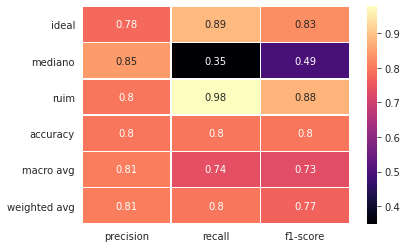

In [155]:
#Relatório de classificação

report_df = pd.DataFrame(classification_report(y_test,prev1, output_dict=True)). T
report_df = report_df.drop(columns=['support'])

sns.heatmap(report_df,cmap='magma',linecolor='white',linewidths=0.5,annot=True)

Também temos a matriz de confusão como métrica, ela nos mostra as frequências de classificação para cada classe do modelo

**Matriz de confusão**

In [143]:
#Matriz de confusão
recozimento = report_df.index[:-3]
matriz = confusion_matrix(y_test,prev1)
matriz = pd.DataFrame(matriz, index=recozimento.values,columns=recozimento.values)
matriz = matriz/matriz.sum(axis=1)[:,np.newaxis] #Normalização em linha (recall)

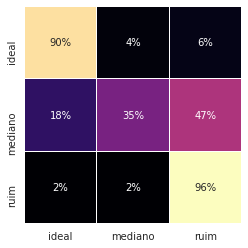

In [154]:
#Plot matriz de confusão
sns.heatmap(matriz,cmap='magma',linecolor='white',linewidths=0.3,annot=True,fmt='.0%',cbar=False,square=True)

Por último e não menos importante, também podemos saber a acurácia dos nossos modelos com o seguinte comando:

In [153]:
#Acurácia -> Diz quanto o modelo acertou de acordo com as previsões possíveis

acc = accuracy_score(y_test,prev1)
print("Acurácia: %2f%%" % (acc*100.00))

Acurácia: 79.835391%


Com as métricas que foram utilizadas para avaliação, podemos concluir que nosso modelo possui facilidade em prever recozimentos do tipo 'ideal' e 'ruim', com uma taxa de recall acima de 89%. Em contrapartida ele sofre nas classificações de recozimento 'mediano', a matriz de confusão prova isso visualmente. 

Esse resultado tem muita ligação com a quantidade de valores missing e talvez com o período que estamos trabalhando (Agosto/2020), seria recomendado um estudo mais aprofundado com amostras mais completas e também mais dados de períodos distintos.

Tendo em vista todas essas circustâncias, penso que o modelo que foi gerado teve um bom resultado!

In [160]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/L2xcBudpN3nXTfV8ya/giphy.gif')

**Novos processos de recozimento**

Feito nosso modelo de machine learning, agora é hora de aplicarmos o mesmo em nossos dados de teste e predizer o resultado de novos processos de recozimento

In [157]:
#Definindo variáveis de entrada
X_prev = test[variaveis_entrada].values

Aplicando LabelEncoder nos dados de teste:

In [159]:
X_prev[:,4] = label_encoder_shape.fit_transform(X_prev[:,4])
X_prev[:,8] = label_encoder_product.fit_transform(X_prev[:,8])
X_prev[:,9] = label_encoder_steel.fit_transform(X_prev[:,9])
X_prev[:,10] = label_encoder_surfacequality.fit_transform(X_prev[:,10])
X_prev[:,11] = label_encoder_condition.fit_transform(X_prev[:,11])
X_prev[:,12] = label_encoder_fomability.fit_transform(X_prev[:,12])
X_prev[:,13] = label_encoder_bw.fit_transform(X_prev[:,13])
X_prev[:,14] = label_encoder_bl.fit_transform(X_prev[:,14])
X_prev[:,15] = label_encoder_temper_rolling.fit_transform(X_prev[:,15])
X_prev[:,16] = label_encoder_bf.fit_transform(X_prev[:,16])
X_prev[:,17] = label_encoder_family.fit_transform(X_prev[:,17])
X_prev[:,18] = label_encoder_nonageing.fit_transform(X_prev[:,18])

Aplicando nosso modelo nos novos processos de recozimento:

In [161]:
#Aplicando modelo em teste
p = xboost.predict(X_prev)

In [162]:
#Criando uma nova coluna no dataset de teste com a variável target
test['recozimento'] = p

In [164]:
#Visualização do dataset com o resultado dos processos de recozimento
test.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,id,recozimento
0,TN,C,K,55,0,T,S,2.0,0,N,NaN,E,NaN,NaN,Y,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COIL,2.200,900.0,0,NaN,0,NaN,1,mediano
1,TN,C,K,45,0,T,S,2.0,0,N,NaN,E,NaN,NaN,Y,NaN,B,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COIL,1.090,610.0,0,NaN,0,NaN,2,mediano
2,TN,C,R,0,0,T,S,3.0,0,N,NaN,E,NaN,NaN,Y,NaN,B,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHEET,1.599,150.0,762,NaN,0,NaN,3,ruim
3,TN,C,A,0,0,T,S,2.0,0,N,NaN,G,NaN,NaN,Y,NaN,B,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COIL,0.400,20.0,0,NaN,0,NaN,4,ruim
4,TN,C,R,0,0,T,S,2.0,0,N,NaN,E,NaN,NaN,Y,Y,B,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COIL,0.699,1320.0,0,NaN,0,NaN,5,ruim


In [166]:
#Passando os dados para csv
test.to_csv("Modelo_recozimento.csv",header=True)

Mas e aí, qual foi o resultado dos novos processos de recozimento?

Já vimos como podemos responder a essa pergunta, o gráfico abaixo pode nos ajudar:

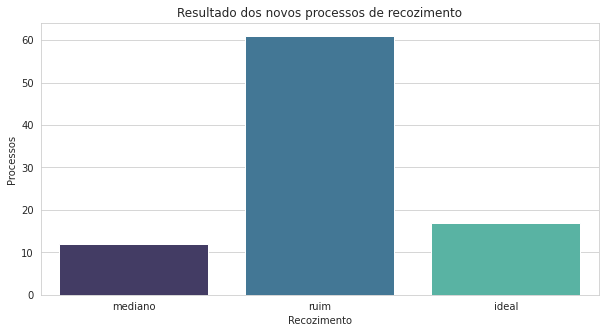

In [167]:
#Resultados dos processos de recozimento
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='recozimento',data=test,palette='mako');
plt.title("Resultado dos novos processos de recozimento");
plt.xlabel("Recozimento");
plt.ylabel("Processos");

In [169]:
test['recozimento'].value_counts()

ruim       61
ideal      17
mediano    12
Name: recozimento, dtype: int64

Acima temos os resultados dos novos processos de recozimento e vale lembrar que estamos falando de 90 processos.

De acordo com a amostra o número de recozimentos 'ruim' foi novamente superior aos de 'ideal' e 'mediano', com a tabela ficando assim:
- Recozimentos '**ruim**': 61 processos, representando aproximadamente 67,77% dos nossos dados. 
- Recozimentos '**medianos**': 12 processos, representando aproximadamente 13,33% dos nossos dados.
- Recozimentos '**ideal**': 17 processos, representando aproximadamente 18,9% dos nossos dados.

**Conclusão**

Através deste estudo, quis trazer ao conhecimento fatos acerca de um dos processos de recozimento com a utilização de diversas visualizações de dados, a fim de deixar o entendimento mais transparente e direto. Algo que também está no escopo deste estudo foi a criação de um modelo de machine learning, passando por processos de tratamentos de dados, modelagem, otimização, avaliação e por fim a submissão do nosso modelo em dados de teste.

Obviamente, como todos os estudos, este não é uma exceção e poderá ser sempre refinado, ainda assim, este sempre estará aberto para novas ideias, feedbacks e ferramentas a serem implementadas.

Os principais resultados que visualizamos aqui é que os processos de recozimento em Agosto/2020 não obtiveram tantos sucessos. Aprendemos que variáveis como tipo de aço, largura da peça, força, dureza e formato tem uma relação direta com o resultado final do recozimento. Além disso, a quantidade de dados missing no conjunto de dados é muito grande, isso acaba afetando de forma direta nossos modelos de machine learning, por este motivo seria recomendável um estudo mais aprofundado para elaborar planos de ações tanto pra melhorar a qualidade das peças, quanto do resultado final dos recozimentos.
